In [1]:
import numpy as np
import matplotlib.pyplot as plt

#konsultacje (dać znać mailem)
#czw 19-21 w A.3.21
#jeszcze inny dzień


In [2]:
#pobranie wszystkich zestawów danych
data1 = np.loadtxt("zad1_lista1.txt")
data2 = np.loadtxt("zad2_lista1.txt")
data3 = np.loadtxt("zad3_lista1.txt")
data4 = np.loadtxt("zad4_lista1.txt")
data6 = np.loadtxt("zad6_lista1.txt")

# Zadanie 1

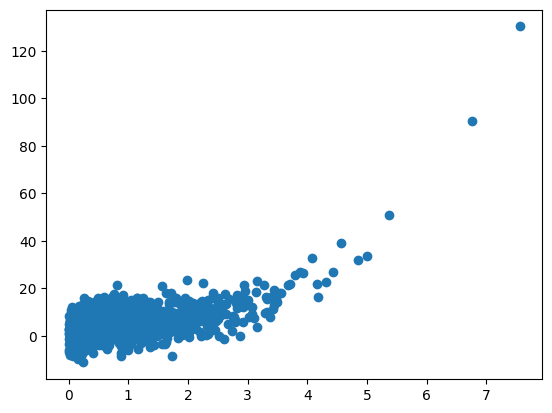

In [3]:
data1_x = np.zeros(len(data1))
data1_y = np.zeros(len(data1))
for i in range(len(data1)):
    data1_x[i] = data1[i][0]
    data1_y[i] = data1[i][1]
plt.scatter(data1_x,data1_y)
value_range = np.linspace(0,8,100)


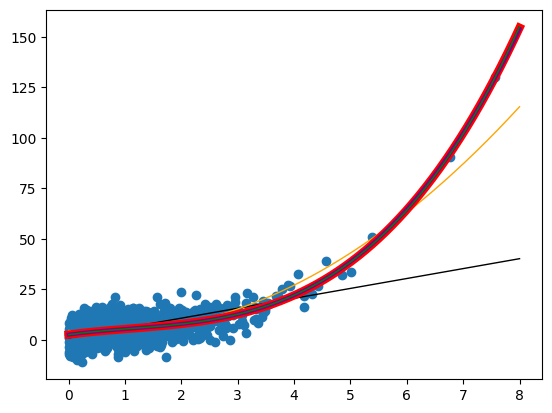

In [4]:
x1 = np.polyfit(data1_x,data1_y,1)
x2 = np.polyfit(data1_x,data1_y,2)
x3 = np.polyfit(data1_x,data1_y,3)
x4 = np.polyfit(data1_x,data1_y,4)
x5 = np.polyfit(data1_x,data1_y,5)

plt.scatter(data1_x,data1_y)
x_values = np.linspace(0,8,1000)

plt.plot(x_values,np.polyval(x1,x_values),linewidth = 1,color = "black",  label = "^1")
plt.plot(x_values,np.polyval(x2,x_values),linewidth = 1,color = "orange",  label = "^2")
plt.plot(x_values,np.polyval(x3,x_values),linewidth = 6,color = "red",  label = "^3")
plt.plot(x_values,np.polyval(x4,x_values),linewidth = 3,color = "purple",  label = "^4")
plt.plot(x_values,np.polyval(x5,x_values),linewidth = 1,color = "green",  label = "^5")


In [5]:
y_poly_1 = np.polyval(x1,data1_x)
y_poly_2 = np.polyval(x2,data1_x)
y_poly_3 = np.polyval(x3,data1_x)
y_poly_4 = np.polyval(x4,data1_x)
y_poly_5 = np.polyval(x5,data1_x)

In [6]:
def d(y,y_appr,n):
    return np.sum(abs(y-y_appr))/n
def mse(y,y_appr,n):
    return np.sum(np.power(y-y_appr,2))/n
def r_sqr(y,y_appr):
    return np.sum(np.power(y_appr - np.mean(y),2))/np.sum(np.power(y - np.mean(y),2))

In [7]:
d_values = np.zeros(5)
mse_values = np.zeros(5)
r_sqr_values = np.zeros(5)

polys = [y_poly_1,y_poly_2,y_poly_3,y_poly_4,y_poly_5]

for i in range(5):
    d_values[i] = d(data1_y, polys[i],len(data1_y))
    mse_values[i] = mse(data1_y, polys[i],len(data1_y))
    r_sqr_values[i] = r_sqr(data1_y, polys[i])


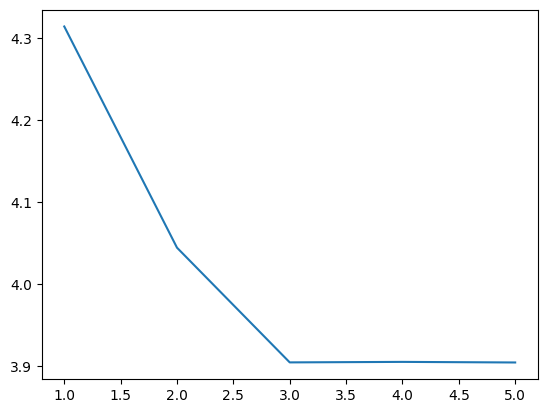

In [8]:
plt.plot(range(1,6),d_values)

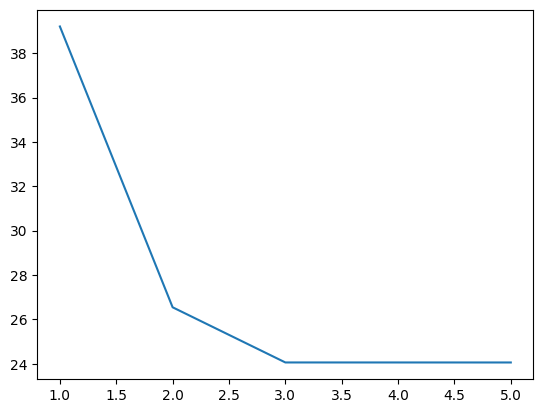

In [9]:
plt.plot(range(1,6),mse_values)

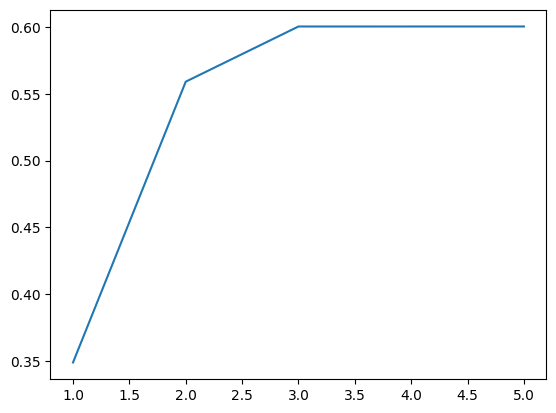

In [10]:
plt.plot(range(1,6),r_sqr_values)

# Zadanie 2

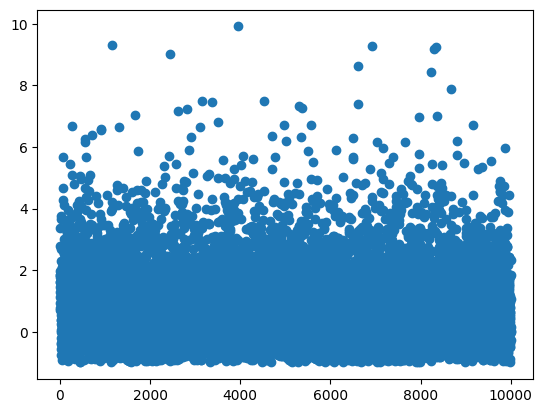

In [11]:
data2
plt.scatter(range(len(data2)),data2)

In [12]:
def sma(data,p):
    smoothed_data = np.zeros(len(data)-2*p)
    for i in range(len(data)-2*p):
        smoothed_data[i] = np.sum(data[i-p:i+p])/(2*p+1)
    return smoothed_data

# ===========================================================================================================

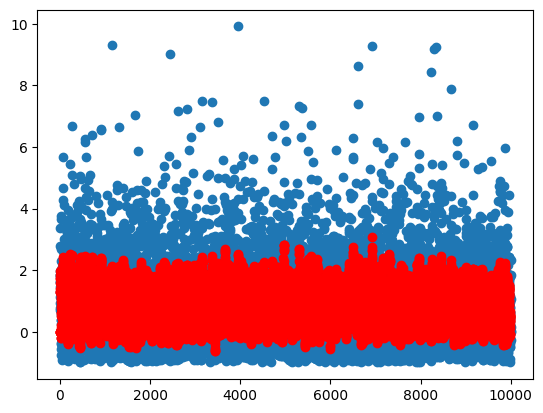

In [13]:
p = 11
smoothed = sma(data2, p = 5)
plt.scatter(range(len(data2)),data2)
plt.scatter(range(len(smoothed)),smoothed,color = "red")


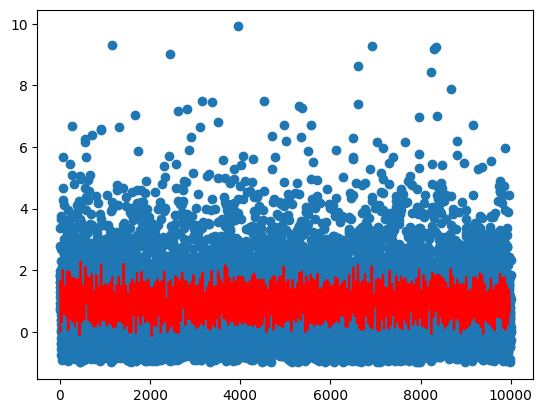

In [14]:
smoothed = sma(data2, p = 12)
plt.scatter(range(len(data2)),data2)
plt.plot(range(len(smoothed)),smoothed,color = "red")

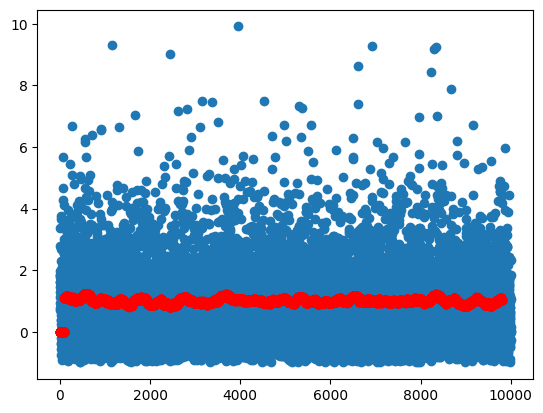

In [15]:
smoothed = sma(data2, p = 100)
plt.scatter(range(len(data2)),data2)
plt.scatter(range(len(smoothed)),smoothed,color = "red")


# Zadanie 3

In [16]:
def regresja_najmn_kwadrt(x,y,n):
    a = (n * np.sum(x*y) - np.sum(x) * np.sum(y) ) / (n * np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(x**2) * np.sum(y) - np.sum(x) * np.sum(x*y)) / (n*np.sum(x**2) - np.sum(x)**2)
    return [a,b]

19.966464658199953 5.2269061712371965


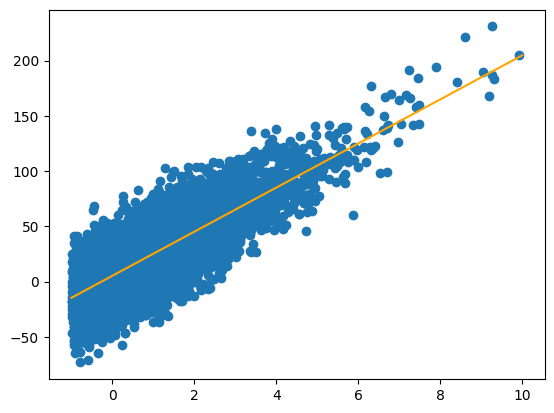

In [17]:
x = data2
y = data3
n = len(x)

a,b = regresja_najmn_kwadrt(x,y,n)
print(a,b)

# print(a,b)
plt.scatter(data2,data3)
values_range = np.linspace(-1,10,10000)
plt.plot(values_range, a*values_range+b,color="orange")

#wygładzenie o 11

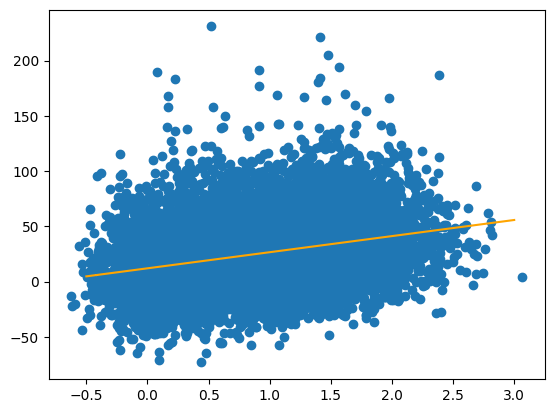

In [18]:
x_2 = sma(data2,5)
y_2 = data3[5:-5]

a_2,b_2 = regresja_najmn_kwadrt(x_2,y_2,n)

plt.scatter(x_2,y_2 )
values_range = np.linspace(-0.5,3,1000)
plt.plot(values_range, a_2*values_range+b_2,color="orange")

# Zadanie 4

In [19]:
#zastosować metode najmniejszych kwadratów
#wykres rozproszenia
#nakładamy regresję

#wyznaczyć residua, policzyć różnicę predykcji i y z danych
#na osi x, numer obserwacji a na osi y, wartość błędu

#usunąć obserwacje odstające
# jakie kryterium na mocno odstające dane?

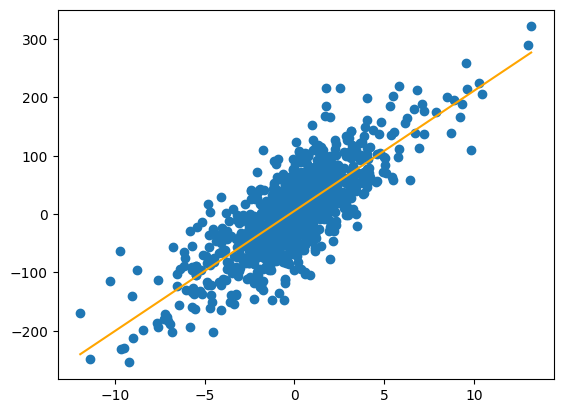

In [25]:
data4_x = np.zeros(len(data4))
data4_y = np.zeros(len(data4))
for i in range(len(data4)):
    data4_x[i] = data4[i][0]
    data4_y[i] = data4[i][1]

plt.scatter(data4_x,data4_y)

a, b = regresja_najmn_kwadrt(data4_x,data4_y,len(data4_x))
value_range = np.linspace(min(data4_x),max(data4_x), 10**3)
plt.plot(value_range, a*value_range + b, color = "orange")

y_errors = data4_y - (a*data4_x + b)

#oś x - numer obserwacji
#oś y - błąd obserwacji
#obliczyć regresję i od faktycznych wartości odjąć predygowane

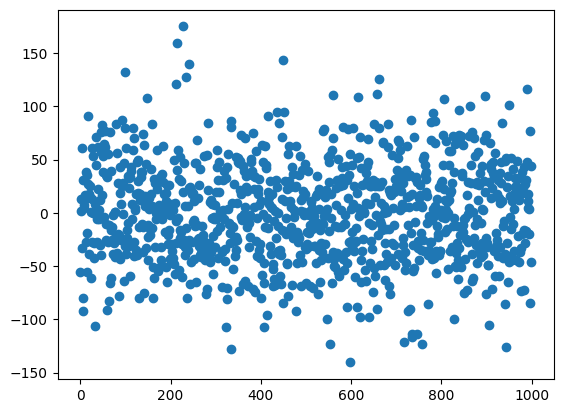

In [27]:
obs_number = range(len(data4_y))
y_errors = data4_y - (a*data4_x + b)
plt.scatter(obs_number,y_errors)

[ True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  T

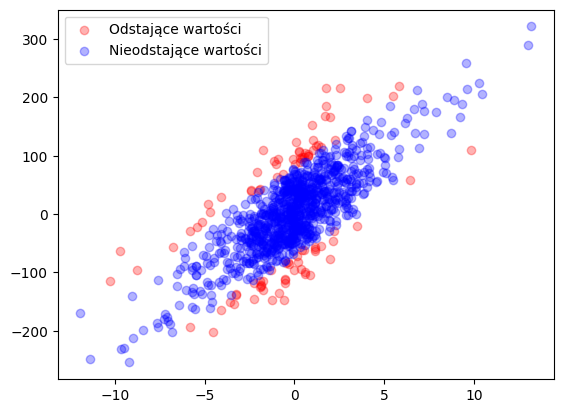

In [42]:
error_index = abs(y_errors)<75
plt.scatter(data4_x[~error_index], data4_y[~error_index], alpha=0.3, color='red', label='Odstające wartości')  
plt.scatter(data4_x[error_index], data4_y[error_index], alpha=0.3, color='blue', label='Nieodstające wartości')  
plt.legend()

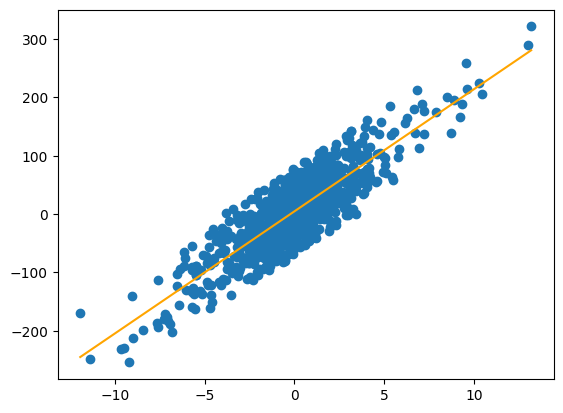

In [37]:
new_data4_y = data4_y[error_index]
new_data4_x = data4_x[error_index]

plt.scatter(new_data4_x,new_data4_y)
a_2, b_2 = regresja_najmn_kwadrt(new_data4_x,new_data4_y,len(new_data4_x))

new_value_range = np.linspace(min(new_data4_x),max(new_data4_x), 10**3)
plt.plot(value_range, a_2*value_range + b_2, color = "orange")

# Zadanie 5

In [72]:
#miary do policzenia, sredni blad bezwzgledny, mse,
#określenie zbiorów
k=990
trening_data4x = data4_x[:k] 
trening_data4y = data4_y[:k] 
test_data4x = data4_x[k:]
test_data4y = data4_y[k:]

# obliczenie regresji i błędów
a, b = regresja_najmn_kwadrt(trening_data4x,trening_data4y,len(trening_data4x))
# a_2, b_2 = regresja_najmn_kwadrt(test_data4x,test_data4y,len(test_data4x))
trening_y_appr = a*trening_data4x + b
trening_y_errors = trening_data4y - trening_y_appr

test_y_appr = a*test_data4x + b
test_y_errors = test_data4y - test_y_appr


#obliczenie miar
trening_data_d = d(trening_data4y,trening_y_appr,len(trening_data4y))
test_data_d = d(test_data4y,test_y_appr,len(test_data4y))
trening_data_mse = mse(trening_data4y,trening_y_appr,len(trening_data4y))
test_data_mse = mse(test_data4y,test_y_appr,len(test_data4y))

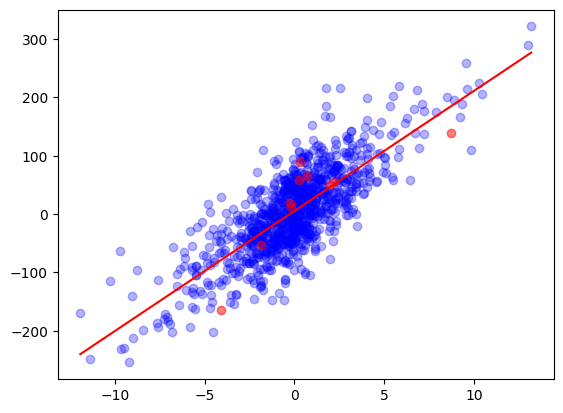

In [73]:
plt.scatter(trening_data4x,trening_data4y, color = "blue",alpha = 0.3)
plt.scatter(test_data4x,test_data4y, color = "red",alpha=0.5)
new_range = np.linspace(min(data4_x),max(data4_x),10**3)
plt.plot(new_range,a*new_range+b,color = "red")

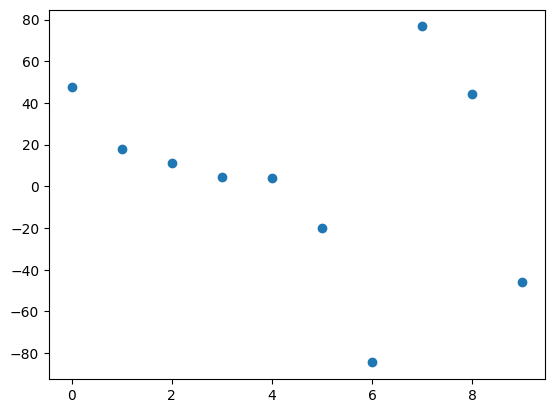

In [78]:
indexes = range(len(test_y_errors))
plt.scatter(indexes,test_y_errors)

In [76]:
print("dla danych treningowych:")
print("d: {}".format(trening_data_d))
print("mse: {}".format(trening_data_mse))

print("")

print("dla danych testowych")
print("d: {}".format(test_data_d))
print("mse: {}".format(test_data_mse))

dla danych treningowych:
d: 36.701512636191524
mse: 2094.2762537603803

dla danych testowych
d: 35.6890747778359
mse: 2026.2648183297729


# Zadanie 6

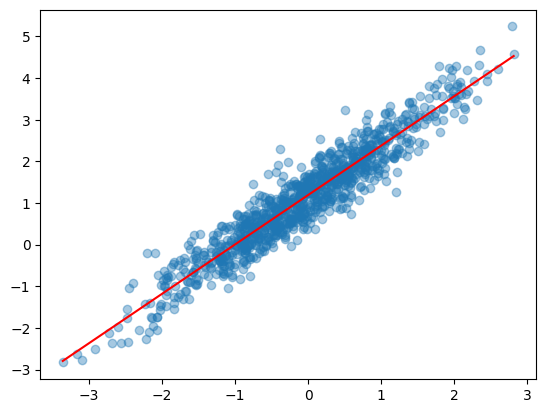

In [87]:
data6_x = np.zeros(len(data6))
data6_y = np.zeros(len(data6))
for i in range(len(data6)):
    data6_x[i] = data6[i][0]
    data6_y[i] = data6[i][1]

# plt.scatter(data6_x,data6_y)

new_data6_y = np.log(data6_y)
plt.scatter(data6_x, new_data6_y,alpha=0.4) #wyrysowanie danych przetworzonych

a, b = regresja_najmn_kwadrt(data6_x,new_data6_y,len(data6_x))
values_range = np.linspace(min(data6_x),max(data6_x),10**3)
plt.plot(values_range, a*values_range + b, color = "red")


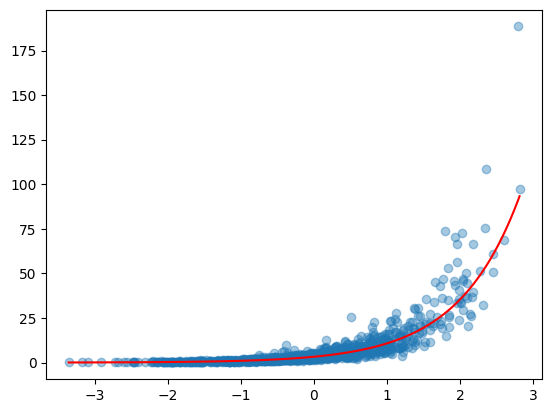

In [90]:
b_0 = np.exp(a)
b_1 = b

plt.scatter(data6_x,data6_y, alpha=0.4)

plt.plot(values_range, b_0*np.exp(b_1*values_range),color="red")
